In [2]:
import numpy as np
import re
import matplotlib.pylab as plt 
%matplotlib inline
import os
import tifffile as tiff

In [3]:
indir = 'H:\\Fanti_Muscioni\\R104_m25\\'

flatdir = os.path.join(indir, 'flat\\')
darkdir = os.path.join(indir, 'dark\\')
tomodir = os.path.join(indir, 'tomo\\')

outdir = os.path.join(indir, 'out\\')

Create output directory

In [4]:
if not os.path.exists(outdir):
    os.makedirs(outdir)

Rebin function

In [5]:
def rebin(img, bin_fact):
    """ 
    Scale the image of a n-factor 
    """
    dim1, dim2 = img.shape
    shape = np.array([dim1/bin_fact, dim2/bin_fact]).astype(int)
    sh = shape[0],img.shape[0]//shape[0],shape[1],img.shape[1]//shape[1]
    return img.reshape(sh).mean(-1).mean(1)

Numerical sort (for images)

In [6]:
def numericalSort(value):
    """ 
    Returns the element in the list or array "value" sorted by their numerical order 
    """
    numbers = re.compile(r'(\d+)')
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

Show image function

In [7]:
def showImage(img, string, dpi):
    dim1, dim2 = img.shape
    fig = plt.figure(frameon = False)
    fig.set_size_inches(dim1/dpi, dim2/dpi)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(img, cmap = 'gray')
    plt.colorbar()
    plt.title(string)
    #return plt.imshow(img, cmap = 'gray')

## Main - Traditional Flat Field Conversion 

+ Binning 2 in x and y
+ Binning 2 in z (sum of two consecutive images)

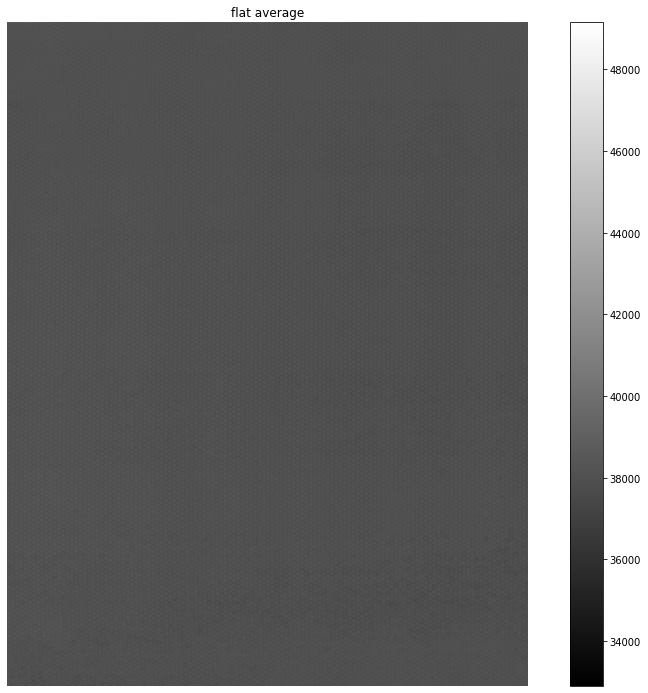

In [78]:
### --- FLAT

flat_list = os.listdir(flatdir)
n_flat = len(flat_list)

flat_n1 = tiff.imread(os.path.join(flatdir, flat_list[0]))
dim1,dim2 = flat_n1.shape

flat_mean = np.zeros([dim1,dim2])
for i in sorted(flat_list, key = numericalSort):
    flat_img = tiff.imread(os.path.join(flatdir,i))
    flat_mean = flat_mean + flat_img 

flat_mean = flat_mean / n_flat
showImage(flat_mean, 'flat average', 250)

### --- DARK

dark_list = os.listdir(darkdir)
n_dark = len(dark_list)

dark_mean = np.zeros([dim1,dim2])
for i in sorted(dark_list, key = numericalSort):
    # dark_img = plt.imread(os.path.join(dark_path,i))
    dark_img = tiff.imread(os.path.join(darkdir,i))
    dark_mean = dark_mean + dark_img

dark_mean = dark_mean / n_dark
#showImage(dark_mean,'dark average', 350)

In [83]:
### --- FLAT - DARK

flat_dark = flat_mean - dark_mean
#showImage(flat_dark, 'flat - dark', 250)

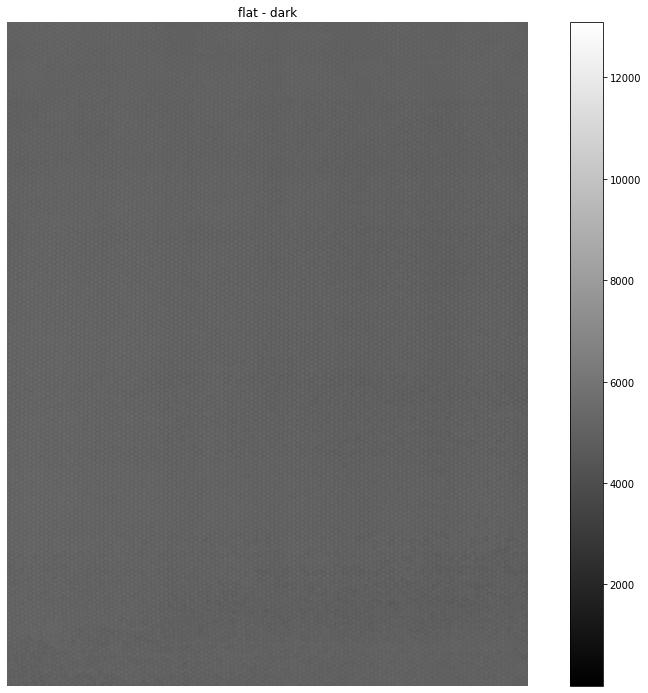

In [103]:
### --- Avoid division per 0
div0 = np.argwhere(flat_dark == 0)
#print(div0)
for i in range(div0.shape[0]):
    flat_dark[div0[i,0], div0[i,1]] = 1

showImage(flat_dark, 'flat - dark', 250)
tiff.imsave(os.path.join(outdir, 'flat_dark.tif'), np.rot90(np.uint16(flat_dark)))

In [85]:
### --- Normalization

v_max = 1.45 # or 1.25 ?
v_min = 0.0

m = 65535 / (v_max - v_min)
q = m*v_min


In [125]:
### --- TOMO

tomo_list = os.listdir(tomodir)
n_tomo = len(tomo_list)

idx = 0
for i in range(0,n_tomo,2):
    print(tomo_list[i], '-',tomo_list[i+1])
    tomo_i0 = tiff.imread(os.path.join(tomodir,tomo_list[i]))
    tomo_i0 = np.divide((tomo_i0 - dark_mean), (flat_dark))
    #showImage(tomo_i0, 'tomo init', 250)
    tomo_i1 = tiff.imread(os.path.join(tomodir,tomo_list[i+1]))
    tomo_i1 = np.divide((tomo_i1 - dark_mean), (flat_dark))
    #showImage(tomo_i0, 'tomo init', 250)
    tomo_img = (tomo_i0 + tomo_i1)/2
    #showImage(tomo_img, 'tomo summed', 250)
    tomo_img = rebin(tomo_img,2)
    tomo_norm = (m*tomo_img)+q
    #showImage(tomo_norm, 'tomo norm', 250)
    tomo_def = np.rot90(np.uint16(tomo_norm))
    #showImage(tomo_def, 'tomo final', 250)
    tiff.imsave(os.path.join(outdir, 'tomo_' + f'{idx:04}' + '.tif'), tomo_def)
    if i == n_tomo:
        print('Conversione finita')
        showImage(tomo_def, 'tomo ffc', 250)
        break
    idx += 1


tomo_0001.tif - tomo_0002.tif
tomo_0003.tif - tomo_0004.tif
tomo_0005.tif - tomo_0006.tif
tomo_0007.tif - tomo_0008.tif
tomo_0009.tif - tomo_0010.tif
tomo_0011.tif - tomo_0012.tif
tomo_0013.tif - tomo_0014.tif
tomo_0015.tif - tomo_0016.tif
tomo_0017.tif - tomo_0018.tif
tomo_0019.tif - tomo_0020.tif
tomo_0021.tif - tomo_0022.tif
tomo_0023.tif - tomo_0024.tif
tomo_0025.tif - tomo_0026.tif
tomo_0027.tif - tomo_0028.tif
tomo_0029.tif - tomo_0030.tif
tomo_0031.tif - tomo_0032.tif
tomo_0033.tif - tomo_0034.tif
tomo_0035.tif - tomo_0036.tif
tomo_0037.tif - tomo_0038.tif
tomo_0039.tif - tomo_0040.tif
tomo_0041.tif - tomo_0042.tif
tomo_0043.tif - tomo_0044.tif
tomo_0045.tif - tomo_0046.tif
tomo_0047.tif - tomo_0048.tif
tomo_0049.tif - tomo_0050.tif
tomo_0051.tif - tomo_0052.tif
tomo_0053.tif - tomo_0054.tif
tomo_0055.tif - tomo_0056.tif
tomo_0057.tif - tomo_0058.tif
tomo_0059.tif - tomo_0060.tif
tomo_0061.tif - tomo_0062.tif
tomo_0063.tif - tomo_0064.tif
tomo_0065.tif - tomo_0066.tif
tomo_0067.

IndexError: list index out of range